In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
aqi = pd.read_csv("2019-04_bme280sof.csv")
aqi.head()

,Unnamed: 0,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,19,1764,879,42.622,23.366,2019-04-01T00:00:06,-17672.91,5.40,72.53
1,20,10261,5175,42.607,23.389,2019-04-01T00:00:06,93669.23,6.98,56.34
2,21,6128,7073,42.673,23.256,2019-04-01T00:00:06,94328.63,5.81,79.33
3,22,6150,3106,42.671,23.319,2019-04-01T00:00:06,94426.91,7.91,63.56
4,23,7582,3832,42.681,23.289,2019-04-01T00:00:06,94645.74,6.28,69.16


In [4]:
aqi1 = aqi.drop(["Unnamed: 0"], axis = 1)
aqi1.head()

,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
0,1764,879,42.622,23.366,2019-04-01T00:00:06,-17672.91,5.40,72.53
1,10261,5175,42.607,23.389,2019-04-01T00:00:06,93669.23,6.98,56.34
2,6128,7073,42.673,23.256,2019-04-01T00:00:06,94328.63,5.81,79.33
3,6150,3106,42.671,23.319,2019-04-01T00:00:06,94426.91,7.91,63.56
4,7582,3832,42.681,23.289,2019-04-01T00:00:06,94645.74,6.28,69.16


In [5]:
aqi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248870 entries, 0 to 5248869
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   sensor_id    int64  
 1   location     int64  
 2   lat          float64
 3   lon          float64
 4   timestamp    object 
 5   pressure     float64
 6   temperature  float64
 7   humidity     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 320.4+ MB


In [6]:
aqi1.location.value_counts()

9756     38361
6239     37618
11750    37342
3132     17459
2970     17451
         ...  
3329       367
12945      194
2250        35
9299         7
3464         1
Name: location, Length: 373, dtype: int64

In [9]:
aqi2 = pd.DataFrame(aqi1[aqi1.location.isin([2343, 1931])])
aqi2.head(10)

,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity
121,4661,2343,42.689,23.307,2019-04-01T00:00:42,94851.64,7.58,60.38
144,3832,1931,42.662,23.289,2019-04-01T00:00:52,94416.39,9.20,53.36
467,4661,2343,42.689,23.307,2019-04-01T00:03:42,94854.01,7.59,60.82
776,4661,2343,42.689,23.307,2019-04-01T00:06:10,94849.27,7.56,60.94
1084,4661,2343,42.689,23.307,2019-04-01T00:08:39,94846.81,7.60,60.74
1396,4661,2343,42.689,23.307,2019-04-01T00:11:08,94847.08,7.61,60.56
1708,4661,2343,42.689,23.307,2019-04-01T00:13:37,94850.48,7.64,60.33
1988,3832,1931,42.662,23.289,2019-04-01T00:15:52,94410.33,9.01,53.80
2023,4661,2343,42.689,23.307,2019-04-01T00:16:06,94850.31,7.58,60.48
2334,4661,2343,42.689,23.307,2019-04-01T00:18:35,94860.14,7.60,60.51


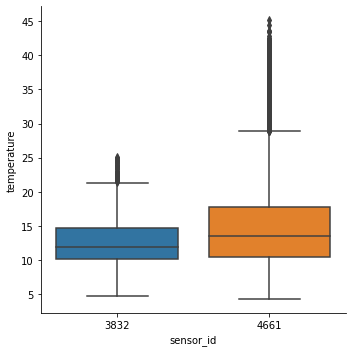

In [11]:
# Boxplot setiap sensor_id
sns.catplot(x="sensor_id", y="temperature", kind="box",data=aqi2)

Berdasarkan boxplot antara sensor_id dan temperature yang terjadi pada tahun 2019 bulan April bahwa:

1. Meskipun temperatur pada sensor_id 4661 terlihat lebih stabil karena miliki rentang lebih panjang dibandingkan sensor_id 3832, namun bila diperhatikan lagi di sensor_id 4661 sering terjadi temperatur ekstrem (fluktuatif) yang sangat tinggi di kisaran 45-30 derajat. Dapat dikatakan pada bulan ini terjadi fenomena temperatur yang tidak stabil karna suhunya bisa mencapai 45 derajat dibandingkan dari nilai kuartilnya.

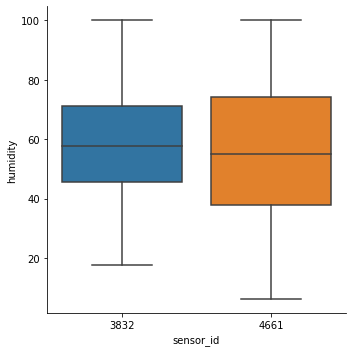

In [15]:
# Boxplot setiap sensor_id
sns.catplot(x="sensor_id", y="humidity", kind="box",data=aqi2)

Berdasarkan boxplot antara sensor_id dan humidity yang terjadi pada tahun 2019 bulan April bahwa:

1. Kelembaban pada sensor_id 3832 maupun sensor_id 4661 terlihat cukup panjang rentang datanya, demikian menunjukan kelembaban di lokasi terpasangnya sensor_id cukup fluktuatif (rendah dan tinggi) namun tidak sampai memiliki kelembaban yang ekstrem.

Setelah dilihat dari boxplot sensor_id antara temperature dan humidity pada tahun 2019 bulan April bahwa:
1. Pada sensor 4661 sebelumnya memiliki temperatur yang sangat fluktuatif mencapai suhu ekstrem 45 derajat, maka humudity (kelembapan) pada sensor ini juga fluktuatif namun tidak sampai memiliki kelembaban yang ekstrem karena berada pada rentang dikisaran 20<kelembaban<100.

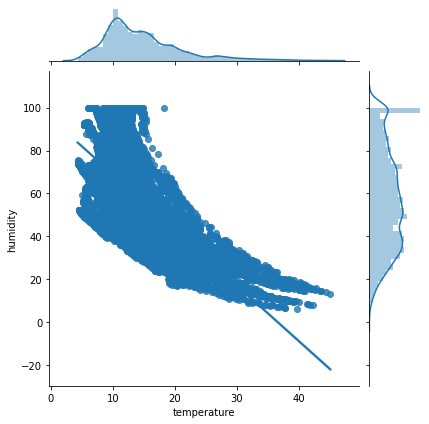

In [13]:
sns.jointplot(x="temperature", y="humidity", data=aqi2, kind="reg");

Dari hasil joint plot bahwa pada plot terdapat hubungan yang kuat dan negatif pada temperature dan humidity. Selain itu, semakin tinggi kelembaban maka semakin rendah juga temperatur. Temperatur lebih dominan di angka kurang dari 10 sampai 20. Sedangkan kelembaban dari 30-100.

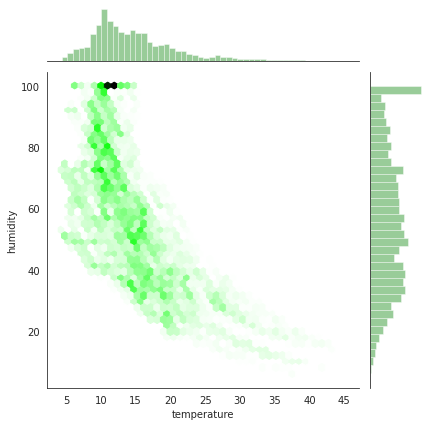

In [14]:
with sns.axes_style("white"):
    sns.jointplot(x="temperature", y="humidity", kind="hex", color="green", data=aqi2);

Berdasarkan hexbin plot:
Menunjukkan hubungan cukup kuat dan negatif, pada plot terjadi penumpukan scatter ditandai dengan warna hijau gelap pada temperature kisaran 10-15 derajat, dan kelembaban sebesar 100.

Kesimpulannya pada bulan april 2019 bahwa jika temperaturnya rendah maka kelembabannya akan meningkat, dan berlaku sebaliknya.
